# Skills challenge \#7
Below are a series of questions. Use the loaded data to answer the questions. You will almost certainly need to import more packages (`pandas`, `numpy`, etc.) to complete these. You are welcome to use any source except for your classmates. So Google away!

You will be graded on both the **correctness** and **cleanliness** of your work. So don't submit poorly written code or your grade will reflect that. Use Markdown describing what you have done. If you get stuck, move on to another part. Most questions don't rely on the answer to earlier questions.

### Imports

In [28]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

### Data loading

In [2]:
df = pd.read_csv('../../data/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data description

This data is a collection of hotel bookings, used previously in the week 4 challenge. The columns we are interested in are:
- **is_canceled** - Value indicating if the booking was canceled (1) or not (0)
- **lead_time** - How many days before the stay the booking was created (i.e. how early they booked their stay)
- **arrival_date_year** - Year of arrival date
- **arrival_date_month** - Month of arrival date
- **arrival_date_week_number** Week number of year for arrival date
- **arrival_date_day_of_month** - Day of arrival date
- **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults** - Number of adults
- **children** - Number of children
- **babies** - Number of babies
- **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

## Tasks

### Data cleaning
**DC1:** Drop all columns except those listed above. Also drop any rows with any missing values. Save the result back to `df`.

In [4]:
df = df[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 
         'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']]
df = df.dropna(how='any')

**DC2:** Create a new column `guests` which is `adults+children+babies`.

In [5]:
df['guests'] = df['adults'] + df['children'] + df['babies']

**DC3:** Label encode all of the categorical columns if they are not already integers.

In [6]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
guests                            float64
dtype: object

In [7]:
le = LabelEncoder()
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'])

### Data exploration

**DE1:** Is the data imbalanced for `is_canceled`?

In [8]:
df['is_canceled'].value_counts(normalize=True)

0    0.629605
1    0.370395
Name: is_canceled, dtype: float64

Somewhat, with about 63% of the bookings not being cancelled.

### Model building

**MB1:** Split the data into training and testing sets. Your test set should have 20% of the data, and the training set should have the remaining 80%. Split the training and testing sets into X and y.

In [17]:
train_df, test_df = train_test_split(df, test_size=0.2)

X_cols = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 
         'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']
y_col = 'is_canceled'

X_train = train_df[X_cols]
y_train = train_df[y_col]

X_test = test_df[X_cols]
y_test = test_df[y_col]

**MB2:** Train a nearest neighbors model using 5 neighbors and all the columns except `is_canceled` to predict the column `is_canceled`. Use the Hamming distance function. Be sure to train on the training set only. 

In [18]:
nn_clf = KNeighborsClassifier(n_neighbors=5, metric='hamming')

nn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Model evaluation

**ME1:** Print a classification report to show the results. Be sure to make your predictions/do your evaluations on the test set only. Create a Markdown cell discussing what you found.

In [19]:
y_pred = nn_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84     14992
           1       0.79      0.54      0.64      8886

    accuracy                           0.77     23878
   macro avg       0.78      0.73      0.74     23878
weighted avg       0.78      0.77      0.76     23878



The precision being 76% for non-canceled bookings means that out of the predicted non-cancellations, about 76% were correct. The same idea holds true for cancellations. The recall being 91% for non-cancellations means our model is identifying most of the non-cancellations. However we are only identifying a little over half of the cancellations (the minority class). The imbalanced f1-score also reinforces the conclusion that our model is better with the non-cancellations than it is with the cancellations. One way to (potentially) fix this is to under or oversample our data, or to weight our classes differently.

**ME2:** Create a nearest neighbors model with a different value for `n_neighbors`. Create a Markdown cell discussing which value seems to be best, this one or the previous value of 5.

In [21]:
nn_clf = KNeighborsClassifier(n_neighbors=10, metric='hamming')
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)

print(f'10 neighbors')
print(classification_report(y_test, y_pred))

10 neighbors
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     14992
           1       0.85      0.46      0.60      8886

    accuracy                           0.77     23878
   macro avg       0.80      0.71      0.72     23878
weighted avg       0.79      0.77      0.75     23878



**ME3:** Create nearest neighbors models using the [Canberra distance metric](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) and whichever number of neighbors you determined was best. Print another classification report.

In [22]:
nn_clf = KNeighborsClassifier(n_neighbors=5, metric='canberra')
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)

print('5 neighbors, Canberra distance function')
print(classification_report(y_test, y_pred))

5 neighbors, Canberra distance function
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     14992
           1       0.72      0.61      0.66      8886

    accuracy                           0.77     23878
   macro avg       0.75      0.74      0.74     23878
weighted avg       0.76      0.77      0.76     23878



**ME4:** Use PCA to show a 2-dimensional representation of *all* of the data (not just the test or training set). Color the points according to whether or not they canceled. Create a Markdown cell describing what you see from the PCA plot.

In [23]:
def split_customers(df):
    noncanceled_df = df[df['is_canceled'] == 0]
    canceled_df = df[df['is_canceled'] == 1]

    X_noncanceled = noncanceled_df[X_cols]
    y_noncanceled = noncanceled_df[y_col]

    X_canceled = canceled_df[X_cols]
    y_canceled = canceled_df[y_col]
    
    return X_noncanceled, y_noncanceled, X_canceled, y_canceled

In [24]:
X_noncanceled, y_noncanceled, X_canceled, y_canceled = split_customers(df)

In [26]:
pca = PCA(n_components=2)
pca.fit(df[X_cols])

X_noncanceled_pca = pca.transform(X_noncanceled)
X_canceled_pca = pca.transform(X_canceled)

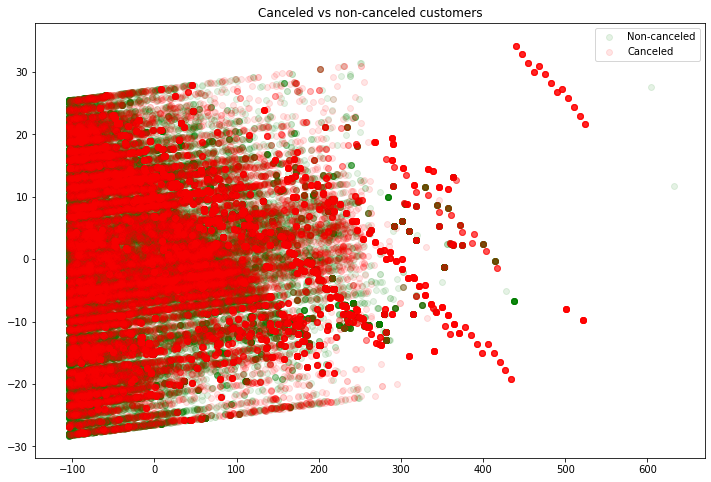

In [30]:
fig = plt.figure(figsize=(12, 8))
# Get all rows, but just the first/second column
plt.scatter(x=X_noncanceled_pca[:, 0], y=X_noncanceled_pca[:, 1], label='Non-canceled', color='green', alpha=0.1)
plt.scatter(x=X_canceled_pca[:, 0], y=X_canceled_pca[:, 1], label='Canceled', color='red', alpha=0.1)

plt.legend()
plt.title('Canceled vs non-canceled customers');

We can see that there is not a lot of separation between the two classes, at least in this two-dimensional representation. Therefore, we wouldn't expect our model to be especially strong. However, our model still returns decent results, suggesting that perhaps this two-dimensional representation is losing a lot of the information.

### Bonus

**B1:** Nearest neighbors can also be used for regression. Google how to do this in sklearn, and create a nearest neighbors regressor to predict the `lead_time` based on all columns except `lead_time`. Create a scatterplot comparing your predictions and the ground truth, along with the score ($R^2$ value).

In [31]:
nn_reg = KNeighborsRegressor(n_neighbors=5, metric='hamming')

In [35]:
cols = list(df.columns)

y_col = 'lead_time'
X_cols = [c for c in cols if c != 'lead_time']

In [36]:
train_df, test_df = train_test_split(df, test_size=0.3)

X_train = train_df[X_cols]
y_train = train_df[y_col]

X_test = test_df[X_cols]
y_test = test_df[y_col]

In [37]:
nn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [38]:
test_pred = nn_reg.predict(X_test)

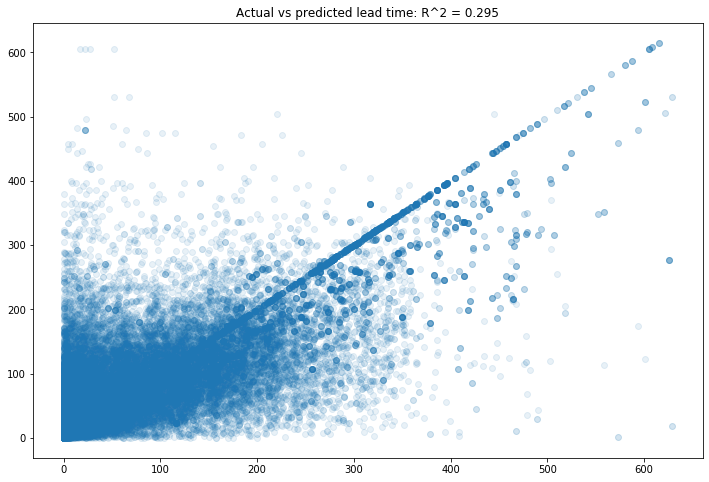

In [41]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=y_test, y=test_pred, alpha=0.1)

plt.title(f'Actual vs predicted lead time: R^2 = {nn_reg.score(X_test, y_test)**2:.3f}');

We can see that there is a general trend of agreement between predicted and actual lead time. However, our model still produces predictions which only somewhat agree with the actual lead times.